In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Read in test data I created

Essentially, each row corresponds to one of the visits. Then the columns are all keywords from the information needs of all visits. Then the weights get filled in when they apply to a visit. For example, below, visit 1[1] had the keyword interest with weight 0.753, but did not have the keyword financial, but some other visit must've had as it is a column in this dataframe. Then with the data on information need like this we can use the kmeans algorithm.

In [2]:
testDF = pd.read_csv('DATA/testKMeansClustering.csv', index_col='visitor_id[visit_number]')

In [3]:
testDF

,interest,financial,stable,information,budget,future,fund,support,security,money,professional,light,family,friend,wait,help,straight,forward,hope,rural
visitor_id[visit_number],,,,,,,,,,,,,,,,,,,,
1[1],0.753,0.000,0.120,0.000,0.000,0.330,0.650,0.000,0.000,0.000,0.00,0.000,0.00,0.000,0.000,0.00,0.000,0.000,0.000,0.440
3[1],0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.678,0.000,0.00,0.500,0.00,0.000,0.342,0.23,0.000,0.800,0.000,0.000
4[6],0.000,0.400,0.000,0.862,0.000,0.000,0.000,0.321,0.000,0.000,0.00,0.000,0.64,0.450,0.000,0.00,0.000,0.000,0.000,0.000
3[2],0.000,0.000,0.000,0.000,0.432,0.000,0.000,0.000,0.000,0.230,0.50,0.000,0.00,0.000,0.000,0.00,0.980,0.000,0.120,0.000
8[2],0.340,0.000,0.440,0.000,0.000,0.873,0.576,0.000,0.000,0.000,0.00,0.000,0.00,0.000,0.000,0.00,0.000,0.000,0.000,0.327
6[1],0.000,0.623,0.000,0.000,0.000,0.550,0.000,0.000,0.000,0.742,0.00,0.000,0.22,0.650,0.000,0.00,0.000,0.000,0.000,0.000
12[9],0.000,0.000,0.000,0.000,0.670,0.000,0.000,0.840,0.000,0.000,0.00,0.000,0.00,0.000,0.650,0.00,0.000,0.000,0.440,0.390
12[10],0.000,0.000,0.582,0.000,0.000,0.000,0.635,0.321,0.000,0.000,0.00,0.000,0.00,0.000,0.000,0.00,0.870,0.540,0.000,0.000
13[3],0.423,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.344,0.000,0.89,0.351,0.00,0.000,0.000,0.55,0.000,0.000,0.000,0.000


In [4]:
testDF.describe()

,interest,financial,stable,information,budget,future,fund,support,security,money,professional,light,family,friend,wait,help,straight,forward,hope,rural
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,0.146571,0.151643,0.081571,0.124714,0.078714,0.175214,0.154286,0.130357,0.073000,0.117429,0.099286,0.159071,0.090000,0.124071,0.133786,0.084286,0.156786,0.140286,0.103286,0.146929
std,0.226605,0.253619,0.186789,0.253751,0.205460,0.308062,0.265104,0.246737,0.196785,0.239807,0.263715,0.295783,0.197016,0.250424,0.231511,0.178873,0.338797,0.283584,0.207499,0.271803
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.221750,0.300000,0.000000,0.092250,0.000000,0.247500,0.224250,0.240750,0.000000,0.075000,0.000000,0.263250,0.000000,0.000000,0.255750,0.000000,0.000000,0.000000,0.090000,0.245250
max,0.753000,0.623000,0.582000,0.862000,0.670000,0.873000,0.650000,0.840000,0.678000,0.742000,0.890000,0.981000,0.640000,0.650000,0.650000,0.550000,0.980000,0.800000,0.676000,0.900000


# Scale the data

In [5]:
scaler = StandardScaler()

In [6]:
scaled_df = pd.DataFrame()

In [11]:
scaled_df['id'] = testDF.index.tolist()

In [15]:
scaled_df.set_index(scaled_df['id'], inplace=True)

In [23]:
column_names = []
for column_name in testDF.columns.values:
    column_names.append(column_name)

In [25]:
scaled_df[column_names] = scaler.fit_transform(testDF[column_names])

In [31]:
scaled_df

,interest,financial,stable,information,budget,future,fund,support,security,money,professional,light,family,friend,wait,help,straight,forward,hope,rural
id,,,,,,,,,,,,,,,,,,,,
1[1],2.777171,-0.620488,0.213499,-0.510036,-0.397574,0.521417,1.940469,-0.548268,-0.384968,-0.508165,-0.390701,-0.558100,-0.474060,-0.514148,-0.599696,-0.488991,-0.480242,-0.513363,-0.516555,1.118954
3[1],-0.671231,-0.620488,-0.453190,-0.510036,-0.397574,-0.590233,-0.603950,-0.548268,3.190485,-0.508165,-0.390701,1.196143,-0.474060,-0.514148,0.933322,0.845375,-0.480242,2.414167,-0.516555,-0.560977
4[6],-0.671231,1.016220,-0.453190,3.015232,-0.397574,-0.590233,-0.603950,0.801823,-0.384968,-0.508165,-0.390701,-0.558100,2.897031,1.350639,-0.599696,-0.488991,-0.480242,-0.513363,-0.516555,-0.560977
3[2],-0.671231,-0.620488,-0.453190,-0.510036,1.784393,-0.590233,-0.603950,-0.548268,-0.384968,0.487146,1.576857,-0.558100,-0.474060,-0.514148,-0.599696,-0.488991,2.521542,-0.513363,0.083592,-0.560977
8[2],0.885816,-0.620488,1.991337,-0.510036,-0.397574,2.350587,1.650797,-0.548268,-0.384968,-0.508165,-0.390701,-0.558100,-0.474060,-0.514148,-0.599696,-0.488991,-0.480242,-0.513363,-0.516555,0.687517
6[1],-0.671231,1.928685,-0.453190,-0.510036,-0.397574,1.262517,-0.603950,-0.548268,-0.384968,2.702793,-0.390701,-0.558100,0.684753,2.179433,-0.599696,-0.488991,-0.480242,-0.513363,-0.516555,-0.560977
12[9],-0.671231,-0.620488,-0.453190,-0.510036,2.986496,-0.590233,-0.603950,2.984680,-0.384968,-0.508165,-0.390701,-0.558100,-0.474060,-0.514148,2.313935,-0.488991,-0.480242,-0.513363,1.683985,0.928053
12[10],-0.671231,-0.620488,2.780252,-0.510036,-0.397574,-0.590233,1.881752,0.801823,-0.384968,-0.508165,-0.390701,-0.558100,-0.474060,-0.514148,-0.599696,-0.488991,2.184607,1.462719,-0.516555,-0.560977
13[3],1.265919,-0.620488,-0.453190,-0.510036,-0.397574,-0.590233,-0.603950,-0.548268,1.429126,-0.508165,3.111552,0.673379,-0.474060,-0.514148,-0.599696,2.701884,-0.480242,-0.513363,-0.516555,-0.560977


# Find optimum K using elbow plot

In [32]:
def find_optimum_k(data, largest_k):
    means = []
    spreads = []
    
    for k in range(2, largest_k): # loop through the k values to try
        kmeans = KMeans(n_clusters=k) # create KMeans instance with number of cluster = k
        kmeans.fit(data) # Apply the k-means clustering to the data
        
        means.append(k) # storing the value of k used
        # The spread of the data within the clusters, want to minimise this to increase cluster accuracy
        spreads.append(kmeans.inertia_)
        
    # Create the elbow plot using matplotlib
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, spreads, 'o-')
    plt.xlabel('K Value (Number of clusters)')
    plt.ylabel('Spread of the data within cluster (Inertias)')
    plt.grid(True)
    plt.show()

# Elbow plot doesn't really have an elbow :) Maybe a sign it is not a good approach or not enough data in the test file

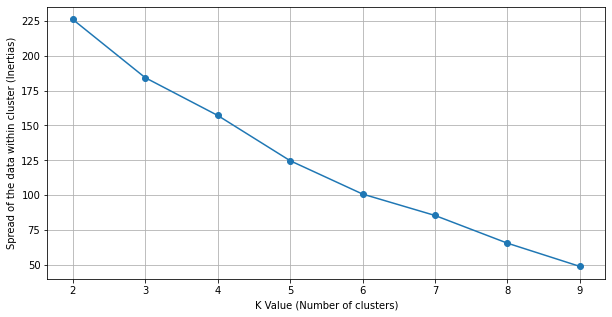

In [34]:
find_optimum_k(scaled_df, 10)

In [35]:
kmeans = KMeans(n_clusters=3) # Chose k = 3

In [36]:
kmeans.fit(scaled_df)

KMeans(n_clusters=3)

# Add the label values to each row

In [37]:
testDF['kmeans_3'] = kmeans.labels_

In [38]:
testDF

,interest,financial,stable,information,budget,future,fund,support,security,money,...,light,family,friend,wait,help,straight,forward,hope,rural,kmeans_3
visitor_id[visit_number],,,,,,,,,,,,,,,,,,,,,
1[1],0.753,0.000,0.120,0.000,0.000,0.330,0.650,0.000,0.000,0.000,...,0.000,0.00,0.000,0.000,0.00,0.000,0.000,0.000,0.440,1
3[1],0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.678,0.000,...,0.500,0.00,0.000,0.342,0.23,0.000,0.800,0.000,0.000,2
4[6],0.000,0.400,0.000,0.862,0.000,0.000,0.000,0.321,0.000,0.000,...,0.000,0.64,0.450,0.000,0.00,0.000,0.000,0.000,0.000,0
3[2],0.000,0.000,0.000,0.000,0.432,0.000,0.000,0.000,0.000,0.230,...,0.000,0.00,0.000,0.000,0.00,0.980,0.000,0.120,0.000,1
8[2],0.340,0.000,0.440,0.000,0.000,0.873,0.576,0.000,0.000,0.000,...,0.000,0.00,0.000,0.000,0.00,0.000,0.000,0.000,0.327,1
6[1],0.000,0.623,0.000,0.000,0.000,0.550,0.000,0.000,0.000,0.742,...,0.000,0.22,0.650,0.000,0.00,0.000,0.000,0.000,0.000,0
12[9],0.000,0.000,0.000,0.000,0.670,0.000,0.000,0.840,0.000,0.000,...,0.000,0.00,0.000,0.650,0.00,0.000,0.000,0.440,0.390,1
12[10],0.000,0.000,0.582,0.000,0.000,0.000,0.635,0.321,0.000,0.000,...,0.000,0.00,0.000,0.000,0.00,0.870,0.540,0.000,0.000,1
13[3],0.423,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.344,0.000,...,0.351,0.00,0.000,0.000,0.55,0.000,0.000,0.000,0.000,2


If you check rows 1[1] and 8[2], you'll see they have the same keywords (with different weights) but these get put in the same group which is good, as they are the same information needs just with different weights. Checking 7[7] and 51[1], again they have the exact same keywords and are put in the same group. If you check 4[6], 6[1], and 8[1], you can see they are the 3 entries labelled with 0, they all have 3 keywords in common with one another, which is another good sign that this is working! The only concern to me is the elbow plot, but also how sparse the real df would be with potentially thousands of keywords.